In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Settings
plt.style.use(plt.style.available[0])
pd.set_option('display.max_columns', 500)

# Working with a real 128 photon train


## Data Formating


Data should be in csv format with the first row being Alice's bases, and the second Alice's bits. The third row should be Bob's bases, and the fourth Bob's bits


## Loading Data


In [41]:
data_df = pd.read_csv("./data/data2.csv",header = None)
data_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,R,D,R,R,D,D,R,D,R,R,R,D,D,R,D,R,D,R,D,R,R,R,R,D,D,D,D,R,R,D,R,D,R,R,D,D,R,R,D,D,D,D,D,D,R,D,R,R,D,D,R,D,D,D,R,D,R,R,D,R,R,R,R,R,R,D,R,R,D,R,R,D,D,D,R,D,D,D,D,R,D,R,D,D,R,D,R,R,D,R,D,R,D,D,R,R,D,D,D,D,R,D,R,R,D,R,R,R,D,R,R,D,R,R,D,R,D,D,D,R,D,D,R,R,D,R,D,D
1,0,1,1,1,1,1,0,0,1,1,1,0,1,1,1,1,0,0,1,0,1,0,1,0,1,1,1,0,0,1,0,1,1,0,1,1,0,1,1,1,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,0,1,0,0,1,1,1,1,1,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1
2,R,R,R,D,D,R,D,R,D,D,R,D,D,D,R,R,D,D,R,R,R,D,D,R,D,D,D,D,R,R,R,D,R,R,R,D,R,R,R,R,D,R,R,D,D,D,R,R,R,D,D,R,R,R,R,D,D,D,R,R,D,R,R,D,R,D,D,D,R,D,D,R,D,R,R,R,D,R,D,D,R,R,R,D,R,D,D,R,R,R,R,R,R,D,D,D,R,D,D,D,D,D,R,D,D,R,D,R,R,D,R,D,D,D,D,R,R,R,D,D,D,D,D,D,D,D,D,R
3,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,1,0,1,0,0,1,1,1,0,1,1,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1,1,0,0,0,1,0,1,1,1,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,0,1,1,1,1,0,1,0,0,0,0,1,1,1,0,0,1,0,0,1,1,0,1,1,0,1,0,0


## Comparing Bases

#### Dropping all measurments where Alice and Bob had differing bases.


In [42]:
matching_base_indices = data_df.columns[data_df.iloc[0]==data_df.iloc[2]]
compared_df = data_df[matching_base_indices]
compared_df

,0,2,4,10,11,12,15,16,19,20,24,25,26,28,30,31,32,33,35,36,37,40,43,45,46,47,49,54,55,59,61,62,64,65,72,74,76,78,81,83,84,85,87,89,91,93,97,98,99,101,102,104,105,107,110,111,114,115,118,120,121,124,126
0,R,R,D,R,D,D,R,D,R,R,D,D,D,R,R,D,R,R,D,R,R,D,D,D,R,R,D,R,D,R,R,R,R,D,D,R,D,D,R,D,R,D,R,R,R,D,D,D,D,D,R,D,R,R,R,D,D,R,D,D,D,D,D
1,0,1,1,1,0,1,1,0,0,1,1,1,1,0,0,1,1,0,1,0,1,0,1,1,0,1,1,0,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0
2,R,R,D,R,D,D,R,D,R,R,D,D,D,R,R,D,R,R,D,R,R,D,D,D,R,R,D,R,D,R,R,R,R,D,D,R,D,D,R,D,R,D,R,R,R,D,D,D,D,D,R,D,R,R,R,D,D,R,D,D,D,D,D
3,0,1,1,1,0,1,1,0,0,1,1,1,1,0,0,1,1,0,1,0,1,0,1,1,0,1,1,0,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0


## Getting Keys


In [43]:
# Getting Keys
alices_key = np.array(compared_df.iloc[1])
bobs_key = np.array(compared_df.iloc[3])

key_df = pd.DataFrame({
  "Alice's Key" : alices_key,
  "Bob's Key" : bobs_key,
}).T
key_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62
Alice's Key,0,1,1,1,0,1,1,0,0,1,1,1,1,0,0,1,1,0,1,0,1,0,1,1,0,1,1,0,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0
Bob's Key,0,1,1,1,0,1,1,0,0,1,1,1,1,0,0,1,1,0,1,0,1,0,1,1,0,1,1,0,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0


## Checking For an Eavsdropper


In [44]:
key_length = alices_key.size # Could also be bobs_key.size

mismatch_indicies = np.where(alices_key != bobs_key)

number_of_mismatches = mismatch_indicies[0].size
percent_of_mismatches = 100*(number_of_mismatches/key_length)

print(F"{key_length=}")
print(F"{number_of_mismatches=}")
print(F"{percent_of_mismatches=}")

key_length=63
number_of_mismatches=0
percent_of_mismatches=0.0


# Testing alot of simulated data


In [1]:
from glob import glob

In [65]:
all_data_paths = glob("./simulated_data_for_testing/**.csv")

In [66]:
per_errors = []
for file_path in all_data_paths:
  data_df = pd.read_csv(file_path, header = None)

  matching_base_indices = data_df.columns[data_df.iloc[0]==data_df.iloc[2]]
  compared_df = data_df[matching_base_indices]

  # Getting Keys
  alices_key = np.array(compared_df.iloc[1])
  bobs_key = np.array(compared_df.iloc[3])

  key_df = pd.DataFrame({
    "Alice's Key" : alices_key,
    "Bob's Key" : bobs_key,
  }).T

  key_length = alices_key.size # Could also be bobs_key.size

  mismatch_indicies = np.where(alices_key != bobs_key)

  number_of_mismatches = mismatch_indicies[0].size
  percent_of_mismatches = 100*(number_of_mismatches/key_length)

  per_errors.append(percent_of_mismatches)

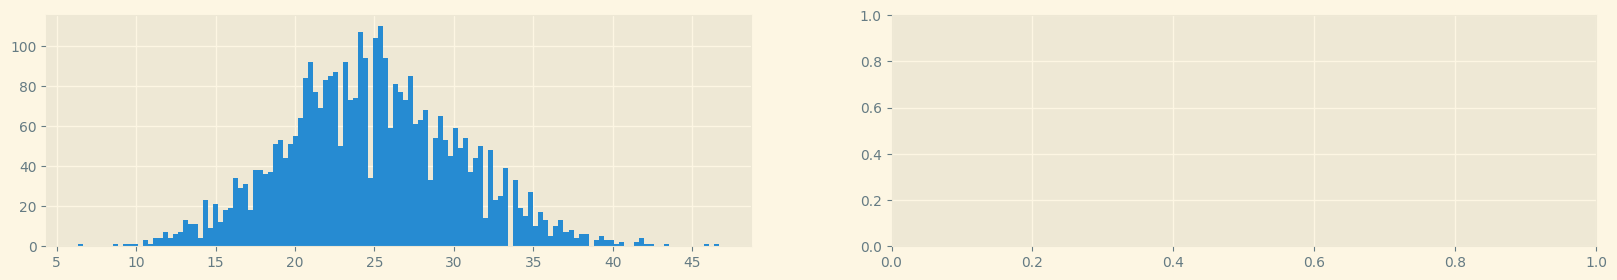

In [75]:
fig,ax = plt.subplots(1,2,figsize = (20,3))
ax.flatten()
per_errors = np.array(per_errors)

ax[0].hist(per_errors[np.where((per_errors!=0))],bins=128)

plt.show()